In [296]:
import numpy as np 
import pandas as pd 
import dataprep
from dataprep import eda
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [297]:
data = pd.read_csv('../Deep learning/data/USA_Housing.csv')

In [298]:
#create_report(data)

In [299]:
data.drop(['Address'],axis=1,inplace=True)

In [300]:
# check columns type
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [301]:
# Putting feature variable to X
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

# Putting response variable to y
y = data['Price']

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=42)


In [303]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [304]:


normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))



In [305]:
print(normalizer.mean.numpy())


[[6.8589141e+04 5.9719949e+00 6.9855590e+00 3.9833877e+00 3.6027980e+04]]


In [306]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim()
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [307]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[55245.34     3.97     8.96     4.38 43557.94]]

Normalized: [[-1.24 -2.03  1.95  0.32  0.76]]


In [308]:

model_2= keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model_2.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))


In [309]:
model_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_74 (Dense)            (None, 32)                192       
                                                                 
 dense_75 (Dense)            (None, 16)                528       
                                                                 
 dense_76 (Dense)            (None, 1)                 17        
                                                                 
Total params: 748
Trainable params: 737
Non-trainable params: 11
_________________________________________________________________


In [310]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=150)

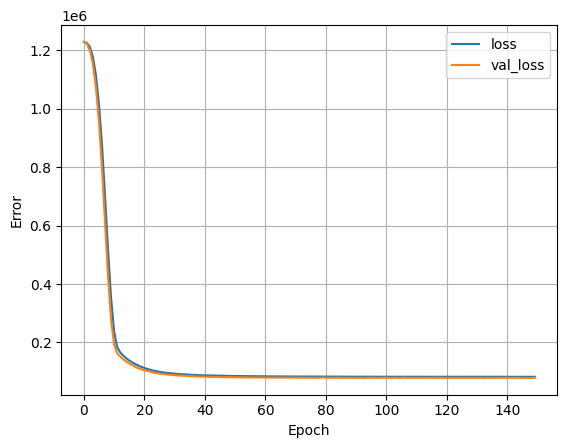

In [311]:
plot_loss(history_2)


In [312]:
# test_results = {}

test_results['model_2'] = model_2.evaluate(X_test,y_test, verbose=0)


In [313]:
test_results

{'model_1': 274800.15625, 'model_2': 81958.96875}

47/47 [==============================] - 0s 1ms/step


1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64

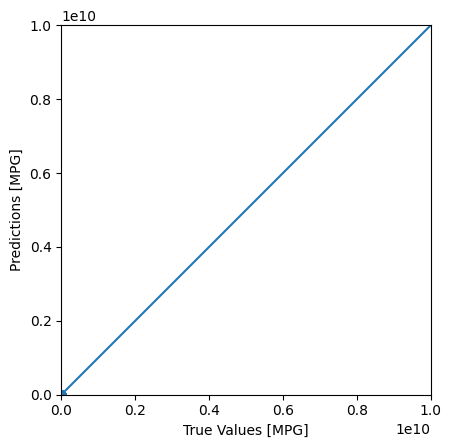

In [317]:
test_predictions = model_2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
y_test